<a href="https://colab.research.google.com/github/NithishaRaghavaraju/Garbage-Classifier-ml-code/blob/main/GC_MultiMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Constructing the DataFrame**

In [1]:
import pandas as pd
import os
import zipfile

In [3]:


# 1. Unzipping the file
with zipfile.ZipFile('/content/drive/MyDrive/Capstone/Project_A.zip', 'r') as zip_ref:
    zip_ref.extractall('pp1')



In [2]:
# 2. Reading the Directory Structure
image_paths = []
labels = []

for root, dirs, files in os.walk('pp1/garbage_classification'):
    i = 0
    for file in files:
        i+=1
        if i >500:
          break
        # Assuming images are .jpg (modify this if there are other formats)
        if file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# 3. Constructing the DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

print(df.head())


                                          image_path    label
0  pp1/garbage_classification/battery/battery685.jpg  battery
1  pp1/garbage_classification/battery/battery851.jpg  battery
2   pp1/garbage_classification/battery/battery55.jpg  battery
3  pp1/garbage_classification/battery/battery816.jpg  battery
4  pp1/garbage_classification/battery/battery359.jpg  battery


In [3]:
print(df.head())

                                          image_path    label
0  pp1/garbage_classification/battery/battery685.jpg  battery
1  pp1/garbage_classification/battery/battery851.jpg  battery
2   pp1/garbage_classification/battery/battery55.jpg  battery
3  pp1/garbage_classification/battery/battery816.jpg  battery
4  pp1/garbage_classification/battery/battery359.jpg  battery


In [4]:
df

image_path        label
0     pp1/garbage_classification/battery/battery685.jpg      battery
1     pp1/garbage_classification/battery/battery851.jpg      battery
2      pp1/garbage_classification/battery/battery55.jpg      battery
3     pp1/garbage_classification/battery/battery816.jpg      battery
4     pp1/garbage_classification/battery/battery359.jpg      battery
...                                                 ...          ...
5995  pp1/garbage_classification/green-glass/green-g...  green-glass
5996  pp1/garbage_classification/green-glass/green-g...  green-glass
5997  pp1/garbage_classification/green-glass/green-g...  green-glass
5998  pp1/garbage_classification/green-glass/green-g...  green-glass
5999  pp1/garbage_classification/green-glass/green-g...  green-glass

[6000 rows x 2 columns]

**Count of each type of garbage**

In [5]:
import plotly.express as px

# Prepare the data for Plotly Express
df_counts = df['label'].value_counts().reset_index()
df_counts.columns = ['Garbage Type', 'Counts']

# Create a bar chart using Plotly Express
fig = px.bar(df_counts,
              x='Garbage Type',
              y='Counts',
              title='No. of Counts for Each Type of Garbage',
              labels={'Garbage Type': 'Type of Garbage', 'Counts': 'Counts'},
              color='Garbage Type',
              category_orders={"Garbage Type": df_counts['Garbage Type'].tolist()},
              text='Counts',  # Add count labels on top of the bars
              color_discrete_sequence=px.colors.qualitative.Dark2)  # Set color scheme

 # Customize the layout
fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_xaxes(title_text=None)  # Remove x-axis label
fig.update_yaxes(title_text=None)  # Remove y-axis label

 # Show the plot
fig.show('')

In [6]:
df

image_path        label
0     pp1/garbage_classification/battery/battery685.jpg      battery
1     pp1/garbage_classification/battery/battery851.jpg      battery
2      pp1/garbage_classification/battery/battery55.jpg      battery
3     pp1/garbage_classification/battery/battery816.jpg      battery
4     pp1/garbage_classification/battery/battery359.jpg      battery
...                                                 ...          ...
5995  pp1/garbage_classification/green-glass/green-g...  green-glass
5996  pp1/garbage_classification/green-glass/green-g...  green-glass
5997  pp1/garbage_classification/green-glass/green-g...  green-glass
5998  pp1/garbage_classification/green-glass/green-g...  green-glass
5999  pp1/garbage_classification/green-glass/green-g...  green-glass

[6000 rows x 2 columns]

**Collecting Some Random Image Data**

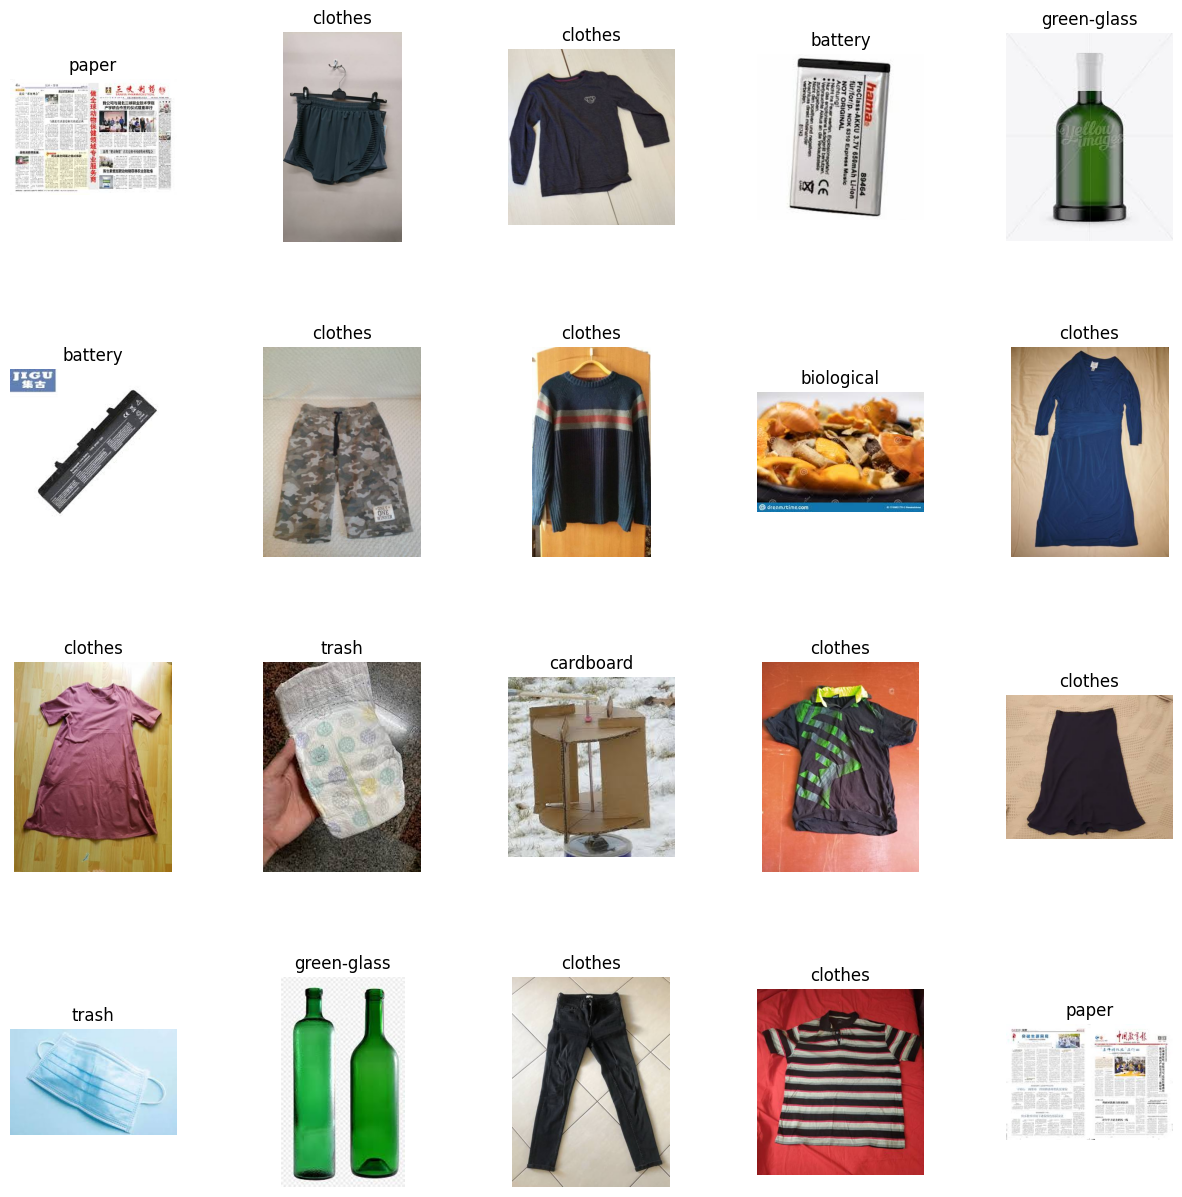

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


# Reading the Directory Structure with filtering
image_paths = []
labels = []

for root, dirs, files in os.walk('pp1/garbage_classification'):
    for file in files:
        # Ignore macOS metadata files and ensure the file is a .jpg
        if not file.startswith("._") and file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Reconstructing the DataFrame with filtered lists
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Sampling and plotting the images (as before)
sample_df = df.sample(n=20)

# Plot the images
fig, axes = plt.subplots(4, 5, figsize=(15, 15))
axes = axes.ravel()

for i in range(20):
    img_path = sample_df.iloc[i]['image_path']
    label = sample_df.iloc[i]['label']

    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(label, fontsize=12)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

**Constructing a DataFrame with Image Data**

In [8]:
import os
import pandas as pd
from PIL import Image

# 1. Collecting the image data
image_data = []

for root, dirs, files in os.walk('pp1/garbage_classification'):
    for file in files:
        if not file.startswith("._") and file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                width, height = img.size
                image_data.append({
                    'image_id': os.path.splitext(file)[0], # Assuming image_id is the file name without extension
                    'image': img,
                    'image_size': f"{width}x{height}",
                    'category': os.path.basename(root)
                })

# 2. Constructing the DataFrame
df = pd.DataFrame(image_data)
df.head()


image_id                                              image image_size  \
0  battery685  <PIL.JpegImagePlugin.JpegImageFile image mode=...    222x227   
1  battery851  <PIL.JpegImagePlugin.JpegImageFile image mode=...    225x225   
2   battery55  <PIL.JpegImagePlugin.JpegImageFile image mode=...    299x169   
3  battery816  <PIL.JpegImagePlugin.JpegImageFile image mode=...    318x159   
4  battery359  <PIL.JpegImagePlugin.JpegImageFile image mode=...    291x173   

  category  
0  battery  
1  battery  
2  battery  
3  battery  
4  battery

**Resizing images**

In [9]:
import os
import pandas as pd
from PIL import Image

# 1. Collecting the image data
image_data = []

for root, dirs, files in os.walk('pp1/garbage_classification'):
    i= 0
    for file in files:
        i+=1
        if i>500:
          break
        if not file.startswith("._") and file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            img = Image.open(file_path)  # Open the image without the 'with' statement
            width, height = img.size
            image_data.append({
                'image_id': os.path.splitext(file)[0],  # Assuming image_id is the file name without extension
                'image': img,
                'image_path': file_path,  # Storing the file path for potential future use
                'image_size': f"{width}x{height}",
                'category': os.path.basename(root)
            })

# 2. Constructing the DataFrame
df = pd.DataFrame(image_data)

# 3. Resizing the images
def resize_image(input_image, target_size=(128, 128)):
    """Resize a PIL Image to the target size."""
    return input_image.resize(target_size)

df['resized_image'] = df['image'].apply(lambda img: resize_image(img, (128, 128)))

# Display the updated DataFrame
df.head()


image_id                                              image  \
0  battery685  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1  battery851  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2   battery55  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3  battery816  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4  battery359  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                          image_path image_size category  \
0  pp1/garbage_classification/battery/battery685.jpg    222x227  battery   
1  pp1/garbage_classification/battery/battery851.jpg    225x225  battery   
2   pp1/garbage_classification/battery/battery55.jpg    299x169  battery   
3  pp1/garbage_classification/battery/battery816.jpg    318x159  battery   
4  pp1/garbage_classification/battery/battery359.jpg    291x173  battery   

                                       resized_image  
0  <PIL.Image.Image image mode=RGB size=128x128 a...  
1  <PIL.Image.Image image mode=RGB size=128x128 a...  
2  <PIL.Image.Image image mode=RGB size=128x128 a...  
3  <PIL.Image.Image image mode=RGB size=128x128 a...  
4  <PIL.Image.Image image mode=RGB size=128x128 a...

**Sample Images from Each Category**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

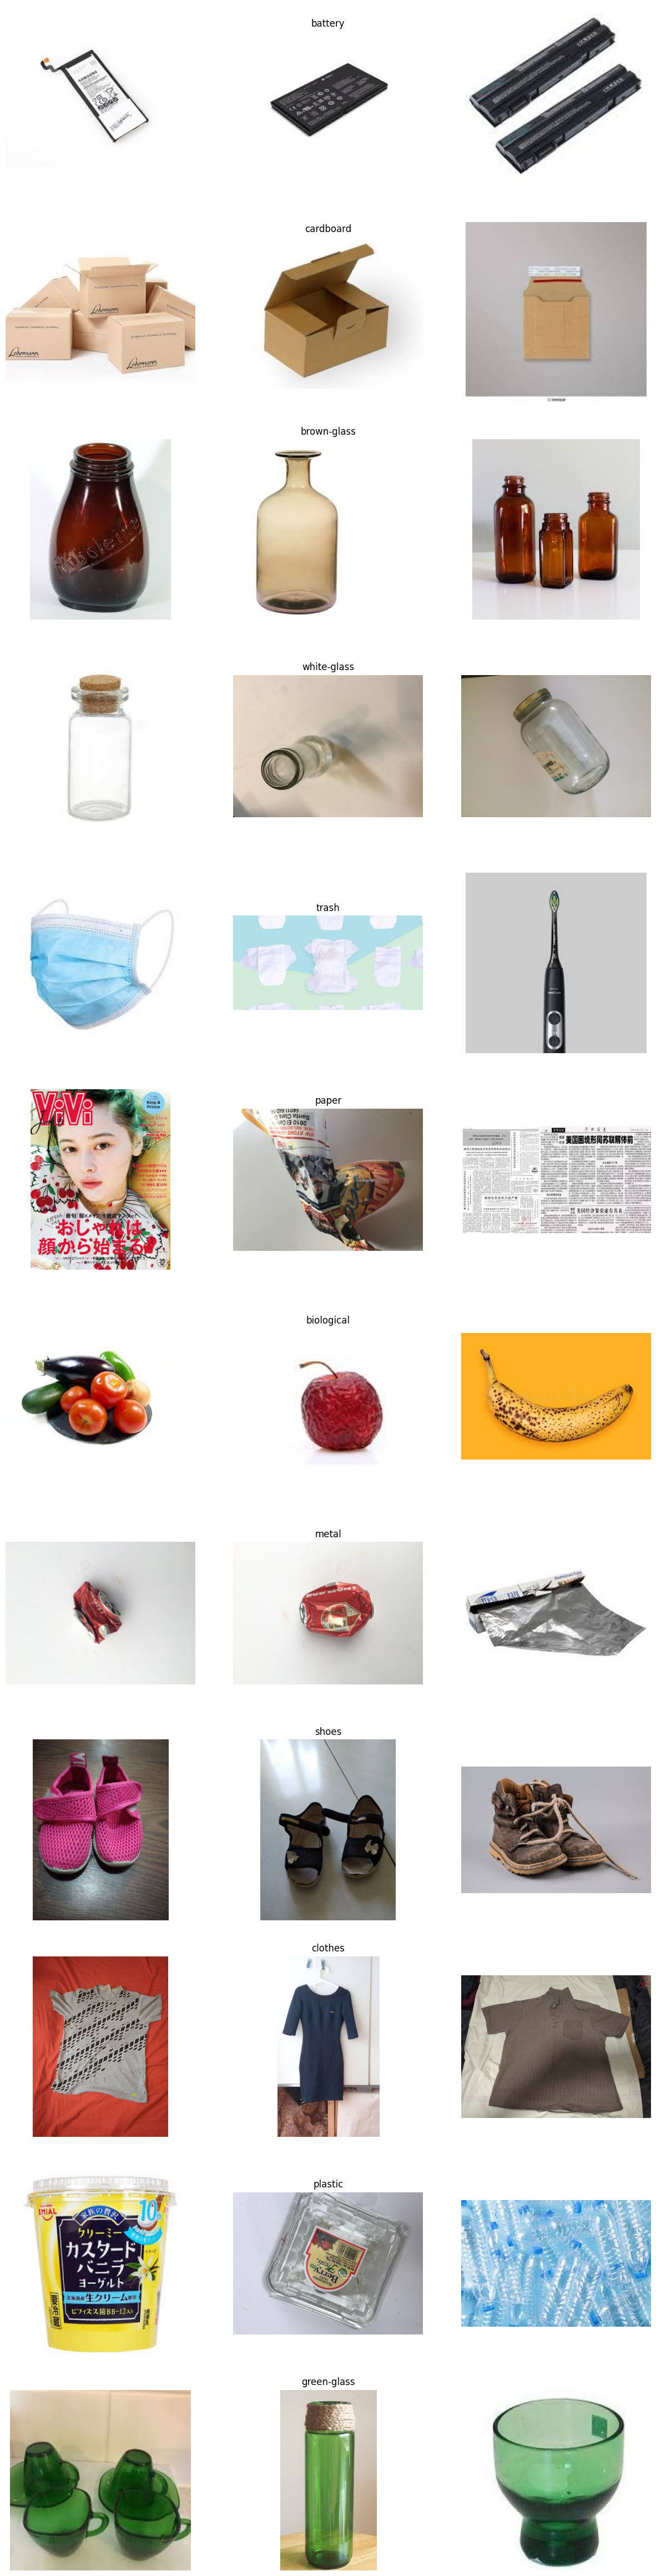

In [11]:
#Sample Images from Each Category:
categories = df['category'].unique()
fig, axes = plt.subplots(len(categories), 3, figsize=(15, 5 * len(categories)))

for i, category in enumerate(categories):
    sample_images = df[df['category'] == category]['image'].sample(3)
    for j, img in enumerate(sample_images):
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 1:
            axes[i, j].set_title(category)

plt.show()

# **Exploratory Data Analysis (EDA)**

**Step 1: Import Libraries and Load Data**

In [12]:
import pandas as pd
import plotly.express as px

# Load the dataset
data = df
data

image_id                                              image  \
0         battery685  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1         battery851  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2          battery55  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3         battery816  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4         battery359  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
...              ...                                                ...   
5995  green-glass600  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5996   green-glass10  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5997  green-glass177  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5998  green-glass619  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5999  green-glass567  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                             image_path image_size  \
0     pp1/garbage_classification/battery/battery685.jpg    222x227   
1     pp1/garbage_classification/battery/battery851.jpg    225x225   
2      pp1/garbage_classification/battery/battery55.jpg    299x169   
3     pp1/garbage_classification/battery/battery816.jpg    318x159   
4     pp1/garbage_classification/battery/battery359.jpg    291x173   
...                                                 ...        ...   
5995  pp1/garbage_classification/green-glass/green-g...    512x384   
5996  pp1/garbage_classification/green-glass/green-g...    275x183   
5997  pp1/garbage_classification/green-glass/green-g...    512x384   
5998  pp1/garbage_classification/green-glass/green-g...    300x168   
5999  pp1/garbage_classification/green-glass/green-g...    225x225   

         category                                      resized_image  
0         battery  <PIL.Image.Image image mode=RGB size=128x128 a...  
1         battery  <PIL.Image.Image image mode=RGB size=128x128 a...  
2         battery  <PIL.Image.Image image mode=RGB size=128x128 a...  
3         battery  <PIL.Image.Image image mode=RGB size=128x128 a...  
4         battery  <PIL.Image.Image image mode=RGB size=128x128 a...  
...           ...                                                ...  
5995  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...  
5996  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...  
5997  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...  
5998  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...  
5999  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...  

[6000 rows x 6 columns]

**Step 2: Data Cleaning**

First, check for missing values and duplicate rows.

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Remove duplicate rows
data = data.drop_duplicates(subset=['image_id'])

image_id         0
image            0
image_path       0
image_size       0
category         0
resized_image    0
dtype: int64


**Step 3: Summary Statistics**

Calculate summary statistics for key variables, primarily focusing on your target variable and selected features.

In [14]:
# Summary statistics for the target variable
target_summary = data['category'].describe()

# Summary statistics for selected features
features_summary = data['image_size'].describe()

print('Target Summary\n',target_summary)
print('\nFeatures Summary\n',features_summary)

Target Summary
 count        6000
unique         12
top       battery
freq          500
Name: category, dtype: object

Features Summary
 count        6000
unique        491
top       512x384
freq         1363
Name: image_size, dtype: object


In [15]:
import pandas as pd

# Summary statistics for the 'category' column
category_summary = df['category'].value_counts()
category_percentage = df['category'].value_counts(normalize=True) * 100

# Summary statistics for the 'image_size' column
image_size_summary = df['image_size'].value_counts()

# Display the results
print("Summary Statistics for 'category' Variable:")
print(category_summary)
print("\nPercentage Distribution of 'category' Variable:")
print(category_percentage)
print("\nSummary Statistics for 'image_size' Variable:")
print(image_size_summary)


Summary Statistics for 'category' Variable:
battery        500
cardboard      500
brown-glass    500
white-glass    500
trash          500
paper          500
biological     500
metal          500
shoes          500
clothes        500
plastic        500
green-glass    500
Name: category, dtype: int64

Percentage Distribution of 'category' Variable:
battery        8.333333
cardboard      8.333333
brown-glass    8.333333
white-glass    8.333333
trash          8.333333
paper          8.333333
biological     8.333333
metal          8.333333
shoes          8.333333
clothes        8.333333
plastic        8.333333
green-glass    8.333333
Name: category, dtype: float64

Summary Statistics for 'image_size' Variable:
512x384    1363
225x225    1133
275x183     358
259x194     289
400x533     260
           ... 
164x307       1
250x199       1
247x187       1
349x144       1
166x304       1
Name: image_size, Length: 491, dtype: int64


**Step 4: Data Visualization**

Use Plotly Express to create visualizations. For instance, you can create a histogram to visualize the distribution of the target variable and a scatter plot to explore the relationship between image size and the target variable (category).

In [16]:
# Scatter plot of Image Size vs. Target variable
scatter_plot = px.scatter(data, x='image_size', y='category', title='Image Size vs. Garbage Category')

scatter_plot

In [17]:
# Box plot of Image Size Distribution by Garbage Category
box_plot = px.box(data, x='category', y='image_size', title='Image Size Distribution by Garbage Category')
box_plot

In [18]:
# Pie chart of Distribution of Garbage Category
pie_chart = px.pie(data, names='category', title='Distribution of Garbage Categories')
pie_chart

In [19]:
# Violin Plot Of Image Size by Garbage Category
violin_plot = px.violin(data, x='category', y='image_size', title='Violin Plot of Image Size by Garbage Category')
violin_plot

##Traning the model

In [20]:
import numpy as np

In [21]:
data

image_id                                              image  \
0         battery685  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1         battery851  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2          battery55  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3         battery816  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4         battery359  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
...              ...                                                ...   
5995  green-glass600  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5996   green-glass10  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5997  green-glass177  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5998  green-glass619  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5999  green-glass567  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                             image_path image_size  \
0     pp1/garbage_classification/battery/battery685.jpg    222x227   
1     pp1/garbage_classification/battery/battery851.jpg    225x225   
2      pp1/garbage_classification/battery/battery55.jpg    299x169   
3     pp1/garbage_classification/battery/battery816.jpg    318x159   
4     pp1/garbage_classification/battery/battery359.jpg    291x173   
...                                                 ...        ...   
5995  pp1/garbage_classification/green-glass/green-g...    512x384   
5996  pp1/garbage_classification/green-glass/green-g...    275x183   
5997  pp1/garbage_classification/green-glass/green-g...    512x384   
5998  pp1/garbage_classification/green-glass/green-g...    300x168   
5999  pp1/garbage_classification/green-glass/green-g...    225x225   

         category                                      resized_image  
0         battery  <PIL.Image.Image image mode=RGB size=128x128 a...  
1         battery  <PIL.Image.Image image mode=RGB size=128x128 a...  
2         battery  <PIL.Image.Image image mode=RGB size=128x128 a...  
3         battery  <PIL.Image.Image image mode=RGB size=128x128 a...  
4         battery  <PIL.Image.Image image mode=RGB size=128x128 a...  
...           ...                                                ...  
5995  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...  
5996  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...  
5997  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...  
5998  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...  
5999  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...  

[6000 rows x 6 columns]

In [22]:
data_required = data.iloc[:,-2:]

In [23]:
data_required

category                                      resized_image
0         battery  <PIL.Image.Image image mode=RGB size=128x128 a...
1         battery  <PIL.Image.Image image mode=RGB size=128x128 a...
2         battery  <PIL.Image.Image image mode=RGB size=128x128 a...
3         battery  <PIL.Image.Image image mode=RGB size=128x128 a...
4         battery  <PIL.Image.Image image mode=RGB size=128x128 a...
...           ...                                                ...
5995  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...
5996  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...
5997  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...
5998  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...
5999  green-glass  <PIL.Image.Image image mode=RGB size=128x128 a...

[6000 rows x 2 columns]

In [24]:
image_data = []
Y = []

for image in range(len(df['resized_image'])):
    # Convert the PIL image to a numpy array and check its shape
    if np.array(df['resized_image'][image]).shape == (128, 128, 3):
        image_data.append((np.array(df['resized_image'][image])).astype(np.float32))
        Y.append(df['category'][image])

# Convert the list of image data to a numpy array
X = np.array(image_data)

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y)

In [26]:
y_train_encoded = pd.get_dummies(y_train_encoded)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_train_encoded, test_size=0.2, random_state=42)

In [28]:
y_train = y_train.to_numpy(dtype=np.float32)

In [29]:
y_train.shape

(4781, 12)

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data augmentation generator.
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)


###VGG16

In [20]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.layers import Input

# Define the input layer
input_layer = Input(shape=(128, 128, 3))

# Load the VGG16 base model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_tensor=input_layer)

# Freeze the VGG16 base model layers
for layer in vgg16_base.layers[:-50]:
    layer.trainable = False

# Add a custom top layer for classification
x = vgg16_base.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(12, activation='softmax')(x)

# Define the model
VGG16_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [21]:
VGG16_model.fit(X_train, y_train, epochs=25)

Epoch 1/25
150/150 [==============================] - 24s 135ms/step - loss: 432.0161 - accuracy: 0.0985
Epoch 2/25
150/150 [==============================] - 20s 133ms/step - loss: 2.6478 - accuracy: 0.0795
Epoch 3/25
150/150 [==============================] - 20s 131ms/step - loss: 2.5620 - accuracy: 0.1431
Epoch 4/25
150/150 [==============================] - 20s 131ms/step - loss: 2.0960 - accuracy: 0.2937
Epoch 5/25
150/150 [==============================] - 20s 131ms/step - loss: 1.8471 - accuracy: 0.3715
Epoch 6/25
150/150 [==============================] - 20s 132ms/step - loss: 1.6993 - accuracy: 0.4313
Epoch 7/25
150/150 [==============================] - 20s 132ms/step - loss: 1.5666 - accuracy: 0.4712
Epoch 8/25
150/150 [==============================] - 20s 131ms/step - loss: 1.4722 - accuracy: 0.5030
Epoch 9/25
150/150 [==============================] - 20s 131ms/step - loss: 1.3757 - accuracy: 0.5300
Epoch 10/25
150/150 [==============================] - 20s 132ms/step -

In [23]:
VGG16_model.evaluate(X_test, y_test)

38/38 [==============================] - 3s 64ms/step - loss: 2.6495 - accuracy: 0.5652


[2.649508476257324, 0.5652173757553101]

###VGG19

In [31]:
from keras.applications import VGG19
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.layers import Input

# Define the input layer
input_layer = Input(shape=(128, 128, 3))

# Load the VGG16 base model
vgg19_base = VGG19(weights='imagenet', include_top=False, input_tensor=input_layer)

# Freeze the VGG16 base model layers
for layer in vgg19_base.layers[:-50]:
    layer.trainable = False

# Add a custom top layer for classification
x = vgg19_base.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(12, activation='softmax')(x)

# Define the model
VGG19_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
VGG19_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

80134624/80134624 [==============================] - 2s 0us/step


In [32]:
VGG19_model.fit(X_train, y_train, epochs=25)

Epoch 1/25
150/150 [==============================] - 38s 176ms/step - loss: 26115.1914 - accuracy: 0.1090
Epoch 2/25
150/150 [==============================] - 25s 165ms/step - loss: 2.8024 - accuracy: 0.1109
Epoch 3/25
150/150 [==============================] - 25s 168ms/step - loss: 2.9963 - accuracy: 0.1027
Epoch 4/25
150/150 [==============================] - 26s 173ms/step - loss: 2.3757 - accuracy: 0.1719
Epoch 5/25
150/150 [==============================] - 26s 172ms/step - loss: 2.0738 - accuracy: 0.2753
Epoch 6/25
150/150 [==============================] - 25s 170ms/step - loss: 1.8724 - accuracy: 0.3491
Epoch 7/25
150/150 [==============================] - 26s 172ms/step - loss: 1.7709 - accuracy: 0.3991
Epoch 8/25
150/150 [==============================] - 26s 172ms/step - loss: 1.6657 - accuracy: 0.4296
Epoch 9/25
150/150 [==============================] - 26s 171ms/step - loss: 1.5554 - accuracy: 0.4691
Epoch 10/25
150/150 [==============================] - 26s 171ms/step

In [33]:
VGG19_model.evaluate(X_test, y_test)

38/38 [==============================] - 3s 73ms/step - loss: 1.7034 - accuracy: 0.5836


[1.703378438949585, 0.5836120247840881]

###DenseNet

In [22]:
from keras.applications import DenseNet201
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.layers import Input

# Define the input layer
input_layer = Input(shape=(128, 128, 3))

# Load the DenseNet201 base model
densenet_base = DenseNet201(weights='imagenet', include_top=False, input_tensor=input_layer)

# Freeze the DenseNet201 base model layers
for layer in densenet_base.layers[:-50]:
    layer.trainable = False

# Add a custom top layer for classification
x = densenet_base.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(12, activation='softmax')(x)

# Define the model
densenet_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
densenet_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [19]:
densenet_model.fit(X_train, y_train, epochs=15)

Epoch 1/15
150/150 [==============================] - 41s 82ms/step - loss: 2.5102 - accuracy: 0.4487
Epoch 2/15
150/150 [==============================] - 12s 78ms/step - loss: 1.2309 - accuracy: 0.6342
Epoch 3/15
150/150 [==============================] - 11s 71ms/step - loss: 0.9318 - accuracy: 0.7082
Epoch 4/15
150/150 [==============================] - 10s 68ms/step - loss: 0.7868 - accuracy: 0.7607
Epoch 5/15
150/150 [==============================] - 11s 73ms/step - loss: 0.6351 - accuracy: 0.7950
Epoch 6/15
150/150 [==============================] - 11s 72ms/step - loss: 0.5230 - accuracy: 0.8377
Epoch 7/15
150/150 [==============================] - 10s 68ms/step - loss: 0.4352 - accuracy: 0.8603
Epoch 8/15
150/150 [==============================] - 11s 73ms/step - loss: 0.3498 - accuracy: 0.8864
Epoch 9/15
150/150 [==============================] - 11s 70ms/step - loss: 0.3182 - accuracy: 0.8963
Epoch 10/15
150/150 [==============================] - 10s 69ms/step - loss: 0.274

In [20]:
densenet_model.evaluate(X_test, y_test)

38/38 [==============================] - 9s 115ms/step - loss: 1.5913 - accuracy: 0.7809


[1.5912868976593018, 0.7809364795684814]

###Resnet50

In [23]:
import tensorflow as tf

# Load the pre-trained ResNet50 model.
resnet50 = tf.keras.applications.ResNet50(weights='imagenet')

# Freeze the layers of the pre-trained model.
for layer in resnet50.layers[:-10]:
  layer.trainable = False

# Add a new fully connected layer to the model.
resnet50_model = tf.keras.Sequential([
  resnet50,
  tf.keras.layers.Dense(12, activation='softmax')
])

# Compile the model.
resnet50_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model.
resnet50_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=25)



102967424/102967424 [==============================] - 3s 0us/step
Epoch 1/25
150/150 [==============================] - 35s 167ms/step - loss: 2.3765 - accuracy: 0.6036
Epoch 2/25
150/150 [==============================] - 27s 179ms/step - loss: 2.2054 - accuracy: 0.7270
Epoch 3/25
150/150 [==============================] - 24s 158ms/step - loss: 2.0340 - accuracy: 0.7703
Epoch 4/25
150/150 [==============================] - 27s 178ms/step - loss: 1.8608 - accuracy: 0.8059
Epoch 5/25
150/150 [==============================] - 27s 178ms/step - loss: 1.7099 - accuracy: 0.8224
Epoch 6/25
150/150 [==============================] - 27s 181ms/step - loss: 1.5531 - accuracy: 0.8465
Epoch 7/25
150/150 [==============================] - 24s 157ms/step - loss: 1.4070 - accuracy: 0.8634
Epoch 8/25
150/150 [==============================] - 27s 178ms/step - loss: 1.2717 - accuracy: 0.8770
Epoch 9/25
150/150 [==============================] - 24s 158ms/step - loss: 1.1488 - accuracy: 0.8904
Epoch 

In [24]:
resnet50_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_2 (Dense)             (None, 12)                12012     
                                                                 
Total params: 25648724 (97.84 MB)
Trainable params: 5476564 (20.89 MB)
Non-trainable params: 20172160 (76.95 MB)
_________________________________________________________________


In [25]:
# Evaluate the model.
resnet50_model.evaluate(datagen.flow(X_test, y_test))

38/38 [==============================] - 8s 181ms/step - loss: 0.5281 - accuracy: 0.8913


[0.5281355977058411, 0.8913043737411499]

In [26]:
Predict_image = data_required["resized_image"][3000]
print(Predict_image)

<PIL.Image.Image image mode=RGB size=128x128 at 0x7A6EB3839F90>


In [27]:
data_required["category"][3000]

'biological'

In [28]:
import numpy as np
import cv2

def resize_and_convert(input_array):
    resized_array = cv2.resize(input_array, (224, 224))

    expanded_array = np.expand_dims(resized_array, axis=0)

    return expanded_array
r_image = resize_and_convert(np.array(data_required["resized_image"][3000]))

In [29]:

predictions = resnet50_model.predict(r_image)

predicted_class = np.argmax(predictions[0])

print(predicted_class)

1/1 [==============================] - 1s 1s/step
1


In [30]:
predicted_integer = 9
category = label_encoder.inverse_transform([predicted_class])

print(category)

['biological']


In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "garbage_classifier_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(resnet50_model, file)